# Employee Attrition Analysis — 01: Data Dictionary Setup

***Initial data import, schema inspection, and professional data dictionary creation***

**Author:** Katherine Ygbuhay  
**Updated:** 2025-01-04  
**Stage:** 01 — Data Setup  
**Runtime:** ~10 minutes  

## Objective

Load the raw employee dataset, inspect its structure, and produce a professional data dictionary that documents variables, types, and definitions for stakeholder reference.

## Scope & Approach

- **Raw data inspection** of `salifort_employee_attrition_raw.csv` without modifications
- **Schema analysis** including data types, missing values, and target distribution  
- **Data dictionary creation** with comprehensive variable documentation
- **Quality assessment** noting data integrity and modeling considerations

## Key Outputs

- Professional data dictionary exported to `docs/reference/data_dictionary.md`
- Schema summary with data quality assessment
- Target variable distribution analysis
- Baseline understanding for subsequent modeling stages

## Prerequisites

- Access to raw employee attrition dataset
- Understanding of HR attrition analysis business context

---

## 1. Imports & Setup

In [1]:
import os
os.environ["PORTFOLIO_PROJECT"] = "employee_attrition_analysis"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.bootstrap import setup_notebook

RAW_NAME  = "salifort_employee_attrition_raw.csv"
PROC_NAME = "salifort_employee_attrition_cleaned.csv"

# For data dictionary we want the RAW dataset
P, df = setup_notebook(raw_filename=RAW_NAME, proc_filename=PROC_NAME, load="raw")

🎨 Accessibility defaults applied (colorblind palette, high-contrast, safe colormap).
✅ Accessibility defaults applied
📁 Project root → /home/admin/Documents/portfolio/coursework/google-advanced-data-analytics/employee_attrition_analysis
✅ Loaded RAW:  data/raw/salifort_employee_attrition_raw.csv | shape=(14999, 10)


## 2. Initial Inspection

In [2]:
## 2. Schema Overview

# Confirm dataset shape and types
print(f"✅ {P.RAW.relative_to(P.ROOT)} | shape={df.shape}")
df.info()

# Preview first rows
df.head()

# Column-level summary
col_summary = pd.DataFrame({
    "dtype": df.dtypes.astype(str),
    "n_unique": df.nunique(),
    "n_missing": df.isna().sum(),
    "missing_pct": (df.isna().mean() * 100).round(2)
}).sort_index()

display(col_summary)

✅ data/raw/salifort_employee_attrition_raw.csv | shape=(14999, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,dtype,n_unique,n_missing,missing_pct
Department,object,10,0,0.0
Work_accident,int64,2,0,0.0
average_montly_hours,int64,215,0,0.0
last_evaluation,float64,65,0,0.0
left,int64,2,0,0.0
number_project,int64,6,0,0.0
promotion_last_5years,int64,2,0,0.0
salary,object,3,0,0.0
satisfaction_level,float64,92,0,0.0
time_spend_company,int64,8,0,0.0


## 4. Target Variable Distribution

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64


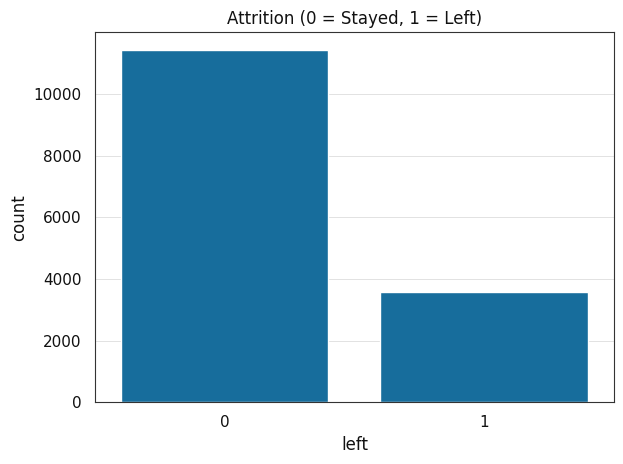

In [3]:
target_col = "left"
print(df[target_col].value_counts(normalize=True).rename("proportion"))
sns.countplot(x=target_col, data=df)
plt.title("Attrition (0 = Stayed, 1 = Left)")
plt.show()

In [4]:
# %% Export Data Dictionary to Markdown
data_dictionary_md = """
# Data Dictionary – Employee Attrition Dataset

| Column                | Type      | Description                                                                 |
|------------------------|-----------|-----------------------------------------------------------------------------|
| satisfaction_level     | float     | Employee’s self-reported satisfaction (0–1 scale).                         |
| last_evaluation        | float     | Performance evaluation score by management (0–1 scale).                    |
| number_project         | int       | Number of projects the employee has worked on.                             |
| average_montly_hours   | int       | Average number of hours worked per month (*note the misspelling retained*).|
| time_spend_company     | int       | Number of years the employee has been with the company.                     |
| Work_accident          | int (0/1) | Whether the employee had a workplace accident (1 = yes).                   |
| left                   | int (0/1) | Target variable: whether the employee left the company (1 = yes).          |
| promotion_last_5years  | int (0/1) | Whether the employee was promoted in the last 5 years.                     |
| Department             | category  | Department name (e.g., sales, support, technical).                         |
| salary                 | category  | Salary category: low, medium, or high.                                     |

---

### Data Quality Notes
- No missing values detected across columns.
- `average_montly_hours` has a spelling error but will be kept as-is for reproducibility.
- `salary` and `Department` are categorical variables requiring encoding for modeling.
- Target (`left`) is imbalanced: ~24% of employees left vs. ~76% retained.
"""
# %% Export Data Dictionary to the current case study's docs/reference

from pathlib import Path

# Find the case-study root by walking up until we see a "docs" or "notebooks" folder
case_root = Path.cwd()
while case_root != case_root.parent:
    if (case_root / "docs").exists() or (case_root / "notebooks").exists():
        break
    case_root = case_root.parent
else:
    raise FileNotFoundError("Could not locate case-study root with 'docs' or 'notebooks'.")

output_path = case_root / "docs" / "reference" / "data_dictionary.md"
output_path.parent.mkdir(parents=True, exist_ok=True)

with open(output_path, "w") as f:
    f.write(data_dictionary_md)

print(f"✅ Data dictionary exported to: {output_path}")
print("Exists?", output_path.exists())

✅ Data dictionary exported to: /home/admin/Documents/portfolio/coursework/google-advanced-data-analytics/employee_attrition_analysis/docs/reference/data_dictionary.md
Exists? True


### Data Quality Notes
- No missing values detected across columns.
- `average_montly_hours` has a spelling error but will be kept as-is for reproducibility.
- `salary` and `Department` are categorical variables requiring encoding for modeling.
- Target (`left`) is imbalanced: ~24% of employees left vs. ~76% retained.

---

## Summary & Next Steps

In this setup stage, we:

- Imported the raw employee attrition dataset.  
- Verified dataset shape, datatypes, and target distribution.  
- Documented all variables in a professional data dictionary.  
- Recorded key data quality notes (e.g., no missing values, categorical variables requiring encoding, slight class imbalance).  
- Exported the finalized data dictionary to `docs/reference/data_dictionary.md` for stakeholder reference.

**Next Steps:**  
Proceed with exploratory data analysis (EDA) to investigate patterns, anomalies, and feature distributions, and prepare the dataset for model construction.